# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../train.p'
testing_file = '../test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
s_train = train['sizes']
c_train = train['coords']

# print(s_train.shape, c_train.shape, s_train[10], c_train[10],s_train[121], c_train[121])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0] #39209

# TODO: Number of testing examples.
n_test = X_test.shape[0] #12630

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(y_test) #42

img_maxPixel = np.max(X_train)#255

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Shape of one image (width, height, depth) =", image_shape)
print('sizes:',s_train.shape,' cords:',c_train.shape)
print('max pixel value = ',img_maxPixel)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 42
Shape of one image (width, height, depth) = (32, 32, 3)
sizes: (39209, 2)  cords: (39209, 4)
max pixel value =  255


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
import csv 

signLabels = []
with open('signnames.csv','rt', encoding='ascii') as signNamesFile:
    signReader = csv.reader(signNamesFile, delimiter=',')
    for row in signReader:
#         print(row[1])
        signLabels.append(row[1])
signLabels = signLabels[1:]        
print(";\n".join(signLabels) )

Speed limit (20km/h);
Speed limit (30km/h);
Speed limit (50km/h);
Speed limit (60km/h);
Speed limit (70km/h);
Speed limit (80km/h);
End of speed limit (80km/h);
Speed limit (100km/h);
Speed limit (120km/h);
No passing;
No passing for vehicles over 3.5 metric tons;
Right-of-way at the next intersection;
Priority road;
Yield;
Stop;
No vehicles;
Vehicles over 3.5 metric tons prohibited;
No entry;
General caution;
Dangerous curve to the left;
Dangerous curve to the right;
Double curve;
Bumpy road;
Slippery road;
Road narrows on the right;
Road work;
Traffic signals;
Pedestrians;
Children crossing;
Bicycles crossing;
Beware of ice/snow;
Wild animals crossing;
End of all speed and passing limits;
Turn right ahead;
Turn left ahead;
Ahead only;
Go straight or right;
Go straight or left;
Keep right;
Keep left;
Roundabout mandatory;
End of no passing;
End of no passing by vehicles over 3.5 metric tons


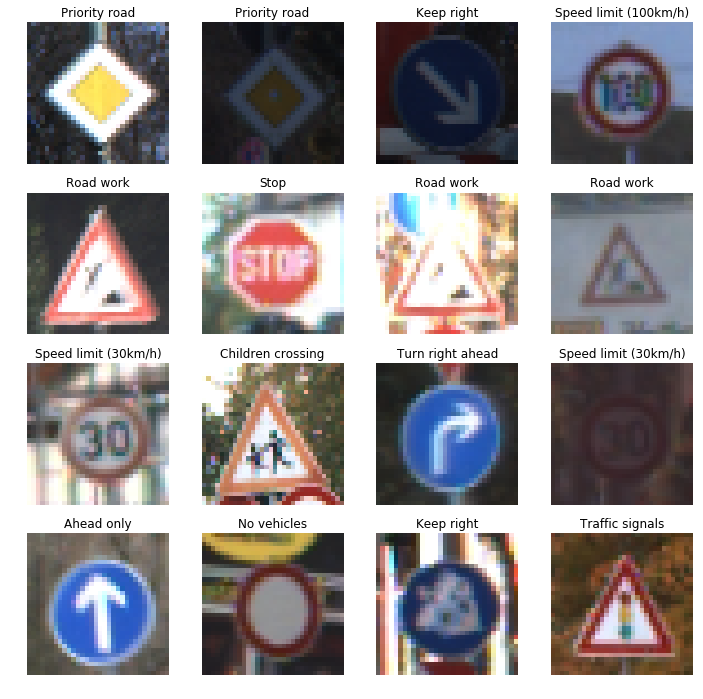

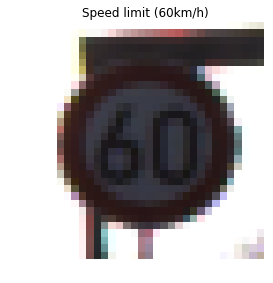

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

def printImgs(x, y, idxArray=None, figsize=(12,12), size1=4, size2=4, cmap=None):
    fig = plt.figure(figsize=figsize)
    if idxArray==None:
        idxArray=np.random.randint(len(x), size=(size1*size2) )
    for idx in range( len(idxArray) ):
        
        plot = fig.add_subplot(4,4,idx+1).axis('off')
        imgIdx = idxArray[idx]
        plt.title(signLabels[ y[imgIdx]] )
        plt.imshow(x[imgIdx].squeeze(), interpolation="nearest", cmap=cmap)
        
    
printImgs(X_train, y_train )
printImgs(X_train, y_train, size1=1, figsize=(20,20), size2=1, idxArray=[5000] )

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
# training setup

import tensorflow as tf

(39209, 32, 32, 3)
(12630, 32, 32, 3)
X_trainPreprocessed[9,0,0,:]=[ 0.26666668]
after processing image shapes: (39209, 32, 32, 1) (12630, 32, 32, 1)
Sample of normalized data [ 0.30588236]
Max/min normalized data point  1.0 0.0117647


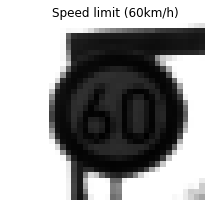

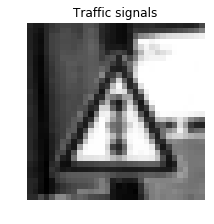

In [6]:
# Grayscale and normalize images through preProcess function.. Notes: fine-tuned the preprocessing,
# using in-place modification of the numpy array 
import cv2

IMAGE_DEPTH = 1 #3 if not colored, 1 if grayscale

print(X_train.shape)
print(X_test.shape)

def preProcess(in_images, normalize=True, grayscale=True):
    outType = np.float32 if normalize else np.uint8
    outImgDimension = 1 if grayscale else 3
    imgDimOne = in_images.shape[1]
    imgDimTwo = in_images.shape[2]
    out_image = np.zeros((len(in_images), imgDimOne , imgDimTwo, outImgDimension), outType)
    
    
    for imgIdx in range(len(in_images)):
        img=in_images[imgIdx]
        if(grayscale):
            img = cv2.cvtColor(in_images[imgIdx], cv2.COLOR_BGR2GRAY)
            img = img.reshape((imgDimOne , imgDimTwo, 1))
        if(normalize):
            img = img/img_maxPixel
        out_image[imgIdx]=img    
    return out_image    



fig2 = plt.figure()

X_trainPreprocessed=preProcess(X_train, grayscale=(IMAGE_DEPTH==1), normalize=True)
X_testPreprocessed = preProcess(X_test, grayscale=(IMAGE_DEPTH==1))
print("X_trainPreprocessed[9,0,0,:]={0}".format(X_trainPreprocessed[9,0,0,:]))
print('after processing image shapes:', X_trainPreprocessed.shape, X_testPreprocessed.shape)


printImgs(X_trainPreprocessed, y_train, size1=1, figsize=(15,15), size2=1, idxArray=[5000] , cmap='gray')
printImgs(X_testPreprocessed, y_test, size1=1, figsize=(15,15), size2=1, idxArray=[5000] , cmap='gray')

print("Sample of normalized data", X_trainPreprocessed[0, 0, 0, :])
print("Max/min normalized data point ", np.max(X_trainPreprocessed),np.min(X_trainPreprocessed))

In [23]:
from sklearn.utils import shuffle



# X_trainPreprocessed, y_train, s_train, c_train = shuffle(X_trainPreprocessed, y_train, s_train, c_train)

EPOCHS = 40
BATCH_SIZE = 512

In [19]:
## This code below allows me to get quick results while setting up/troubleshooting the pipeline

subsetTrainIdx = n_train #basically all data
subsetTestIdx = n_train

## split data into training and validation set
# X_training, X_validation =  X_trainPreprocessed[:subsetTrainIdx], X_testPreprocessed[:subsetTestIdx]
# y_training, y_validation = y_train[:splitIdx], y_train[splitIdx:splitEnd]
# s_training, s_validation = s_train[:splitIdx], s_train[splitIdx:splitEnd]
# c_training, c_validation = c_train[:splitIdx], c_train[splitIdx:splitEnd]


# print("X/y training/validation shapes =",X_training.shape, X_validation.shape, y_training.shape, y_validation.shape)
# print("c/s training/validation shapes =", s_training.shape, s_validation.shape, c_training.shape, c_validation.shape)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer:**

I shuffle the data because I noticed that many consecutive images are simmilar which need shuffled especially if I am planning to divide data between validation and training sets. Also made sure to include all the attributes like sizes, labels, etc. 

Then I normalized the data, dividing by 255 (max value). I tried a tensorflow l2_normalize, but it was slow or even failing. 

In [9]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

I took about a quarter of the dataset as validation set, and left the training set be first 30,000 images after being shuffled. 

**Answer:**

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# let's start by repeating LeNet architecture
# input - conv+act - pooling - conv+act - pooling - flatten - fullyConnect+act - fullyConnect
from tensorflow.contrib.layers import flatten


def NNet(x):
    mu = 0
    sigma = 0.1
    
    conv1_w = tf.Variable( tf.truncated_normal(shape=(5,5,IMAGE_DEPTH,6), mean=mu, stddev=sigma) )
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID')+conv1_b
    conv1 = tf.nn.relu(conv1)
    
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # applying dropout --- will wait on that 
#     fc2 = tf.nn.dropout(fc2, dropout)
    
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 42), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(42))
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    

    return logits

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# let's start by repeating LeNet architecture
# input - conv+act - pooling - conv+act - pooling - flatten - fullyConnect+act - fullyConnect
from tensorflow.contrib.layers import flatten


def NNet3(x, dropoutArg):
    mu = 0
    sigma = 0.1
    
    conv1_w = tf.Variable( tf.truncated_normal(shape=(5,5,IMAGE_DEPTH,6), mean=mu, stddev=sigma) )
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID')+conv1_b
    conv1 = tf.nn.relu(conv1)
    
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. 
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 84), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(84))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, dropoutArg)
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(84, 42), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(42))
    
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    
    

    return logits

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# let's start by repeating LeNet architecture
# input - conv+act - pooling - conv+act - pooling - flatten - fullyConnect+act - fullyConnect
from tensorflow.contrib.layers import flatten


def NNet2(x, dropoutArg):
    mu = 0
    sigma = 0.1

#     Architecture: CONV same out 32x32x6 > pooling out 24x24x6 > conv valid out 20x20x12 > pool valid 10x10x12 > 
#     fc0(flatten) 1200 >  fc1 1200 to 600 > fc2 600 to 100 > fc3 out 42

    
    #     input image: 32x32x1 ; out 32x32x6
    conv1_w = tf.Variable( tf.truncated_normal(shape=(5,5,IMAGE_DEPTH,6), mean=mu, stddev=sigma) )
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='SAME')+conv1_b
    conv1 = tf.nn.relu(conv1)
    
#     Pooling out 24x24x6
    conv1 = tf.nn.avg_pool(conv1, ksize=[1,9,9,1], strides=[1,1,1,1], padding='VALID')
    
    
    
    
    #Convolution. Input = 24x24x6. Output = 10x10x12.
    conv2_w=tf.Variable(tf.truncated_normal( shape=(5,5,6,12) ,mean=mu, stddev=sigma  ))
    conv2_b = tf.Variable(tf.zeros(12))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,2,2,1], padding='VALID')
    conv2 = tf.add(conv2, conv2_b)
#     print(conv2) 20x20x12
    conv2 = tf.nn.relu(conv2)
    
#     Pooling output 5x5x12
    conv2 = tf.nn.avg_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
#     print(conv2)
    
    
    #Flatten. Output = 300.
    fc0   = flatten(conv2)
#     print(fc0)
    
    
    
    # Layer 3: Fully Connected. Input = 300. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(300, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.add(tf.matmul(fc0, fc1_W),fc1_b)
    
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    print(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    print(fc2)
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    fc2 = tf.nn.dropout(fc2, dropoutArg)
    
    # Layer 5: Fully Connected. Input = 84. Output = 42.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 42), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(42))
    
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I followed closely LeNet architecture, I have 
Convolution - relu - pooling --->

Convolution - relu - pooling --->

fully connected - relu --->

fully connected - relu --->

fully connected to output 

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, IMAGE_DEPTH))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y , 42)
keep_prob=tf.placeholder(tf.float32)

In [20]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.0005

dropout = 0.5 #not using dropout yet

# logits = NNet(x)
# logits = NNet2(x, keep_prob)
logits = NNet3(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
#     num_examples = 500
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples, loss

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = n_train
#     num_examples = 256
    print("num_examples=",num_examples)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_training, y_training = shuffle(X_trainPreprocessed, y_train)
#         printImgs(X_training, y_training, size1=1, figsize=(15,15), size2=1, idxArray=[5000] , cmap='gray')
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_training[offset:end], y_training[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:dropout})
            
        validation_accuracy, loss = evaluate(X_testPreprocessed, y_test)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}, loss={:.3f}".format(validation_accuracy, loss))
        
    saver.save(sess, './trafPredResult')
    print("Model saved")

num_examples= 39209
Training...

EPOCH 1 ...
Validation Accuracy = 0.169, loss=3.361
EPOCH 2 ...
Validation Accuracy = 0.389, loss=2.576
EPOCH 3 ...
Validation Accuracy = 0.489, loss=1.990
EPOCH 4 ...
Validation Accuracy = 0.561, loss=1.665
EPOCH 5 ...
Validation Accuracy = 0.637, loss=1.414
EPOCH 6 ...
Validation Accuracy = 0.676, loss=1.262
EPOCH 7 ...
Validation Accuracy = 0.697, loss=1.161
EPOCH 8 ...
Validation Accuracy = 0.723, loss=1.069
EPOCH 9 ...
Validation Accuracy = 0.743, loss=1.011
EPOCH 10 ...
Validation Accuracy = 0.757, loss=0.967
EPOCH 11 ...
Validation Accuracy = 0.769, loss=0.916
EPOCH 12 ...
Validation Accuracy = 0.777, loss=0.885
EPOCH 13 ...
Validation Accuracy = 0.783, loss=0.865
EPOCH 14 ...
Validation Accuracy = 0.795, loss=0.822
EPOCH 15 ...
Validation Accuracy = 0.798, loss=0.829
EPOCH 16 ...
Validation Accuracy = 0.806, loss=0.800
EPOCH 17 ...
Validation Accuracy = 0.816, loss=0.759
EPOCH 18 ...
Validation Accuracy = 0.817, loss=0.774
EPOCH 19 ...
Validatio

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.